In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow


In [2]:
# Load Dataset
restaurant_data = pd.read_csv('tips.csv')

# Display the first few rows
restaurant_data.head()

# Dataset Information
print(restaurant_data.info())
print("Missing Values per Column:\n", restaurant_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB
None
Missing Values per Column:
 total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name  

In [3]:
# Encoding Categorical Variables
restaurant_data_encoded = pd.get_dummies(
    restaurant_data, 
    columns=['sex', 'smoker', 'day', 'time'], 
    drop_first=True
)
# Apply get_dummies for any remaining non-numeric columns
restaurant_data_encoded = pd.get_dummies(restaurant_data_encoded, drop_first=True)

Regression Techniques

In [4]:
# Initialize Dictionary for Storing Model Results
model_performance = {}

In [5]:
# Split the cleaned data into features and target
features_data = restaurant_data_encoded.drop('tip', axis=1)
target_data = restaurant_data_encoded['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features_data, target_data, 
    test_size=0.2, random_state=42
)


Linear Regression

In [6]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions_linear = linear_model.predict(X_test)

model_performance['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, predictions_linear),
    'MSE': mean_squared_error(y_test, predictions_linear),
    'R2': r2_score(y_test, predictions_linear)
}

Ridge Regression

In [7]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
predictions_ridge = ridge_model.predict(X_test)

model_performance['Ridge Regression'] = {
    'MAE': mean_absolute_error(y_test, predictions_ridge),
    'MSE': mean_squared_error(y_test, predictions_ridge),
    'R2': r2_score(y_test, predictions_ridge)
}

/home/rynk/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Lasso Regression

In [8]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
predictions_lasso = lasso_model.predict(X_test)

model_performance['Lasso Regression'] = {
    'MAE': mean_absolute_error(y_test, predictions_lasso),
    'MSE': mean_squared_error(y_test, predictions_lasso),
    'R2': r2_score(y_test, predictions_lasso)
}


Decision Tree Regression

In [9]:
# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
predictions_tree = decision_tree_model.predict(X_test)

model_performance['Decision Tree'] = {
    'MAE': mean_absolute_error(y_test, predictions_tree),
    'MSE': mean_squared_error(y_test, predictions_tree),
    'R2': r2_score(y_test, predictions_tree)
}


Random Forest Regression

In [10]:
# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
predictions_rf = random_forest_model.predict(X_test)

model_performance['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, predictions_rf),
    'MSE': mean_squared_error(y_test, predictions_rf),
    'R2': r2_score(y_test, predictions_rf)
}


Support Vector Regression

In [11]:
# Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
predictions_svr = svr_model.predict(X_test)

model_performance['SVR'] = {
    'MAE': mean_absolute_error(y_test, predictions_svr),
    'MSE': mean_squared_error(y_test, predictions_svr),
    'R2': r2_score(y_test, predictions_svr)
}


KNN Regression

In [12]:
# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)

model_performance['KNN'] = {
    'MAE': mean_absolute_error(y_test, predictions_knn),
    'MSE': mean_squared_error(y_test, predictions_knn),
    'R2': r2_score(y_test, predictions_knn)
}


In [13]:
# Displaying Model Results
for model_name, metrics in model_performance.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Linear Regression:
  MAE: 0.8965
  MSE: 1.2732
  R2: -0.0186
Ridge Regression:
  MAE: 1.0245
  MSE: 1.3846
  R2: -0.1077
Lasso Regression:
  MAE: 0.6791
  MSE: 0.6541
  R2: 0.4767
Decision Tree:
  MAE: 0.7482
  MSE: 1.1529
  R2: 0.0777
Random Forest:
  MAE: 0.6637
  MSE: 0.7449
  R2: 0.4041
SVR:
  MAE: 1.0067
  MSE: 1.3684
  R2: -0.0947
KNN:
  MAE: 1.0669
  MSE: 1.5487
  R2: -0.2390


Visualizations

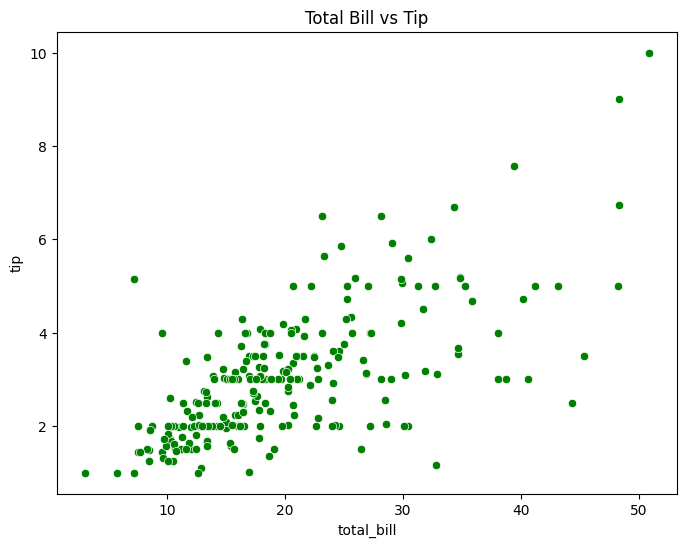

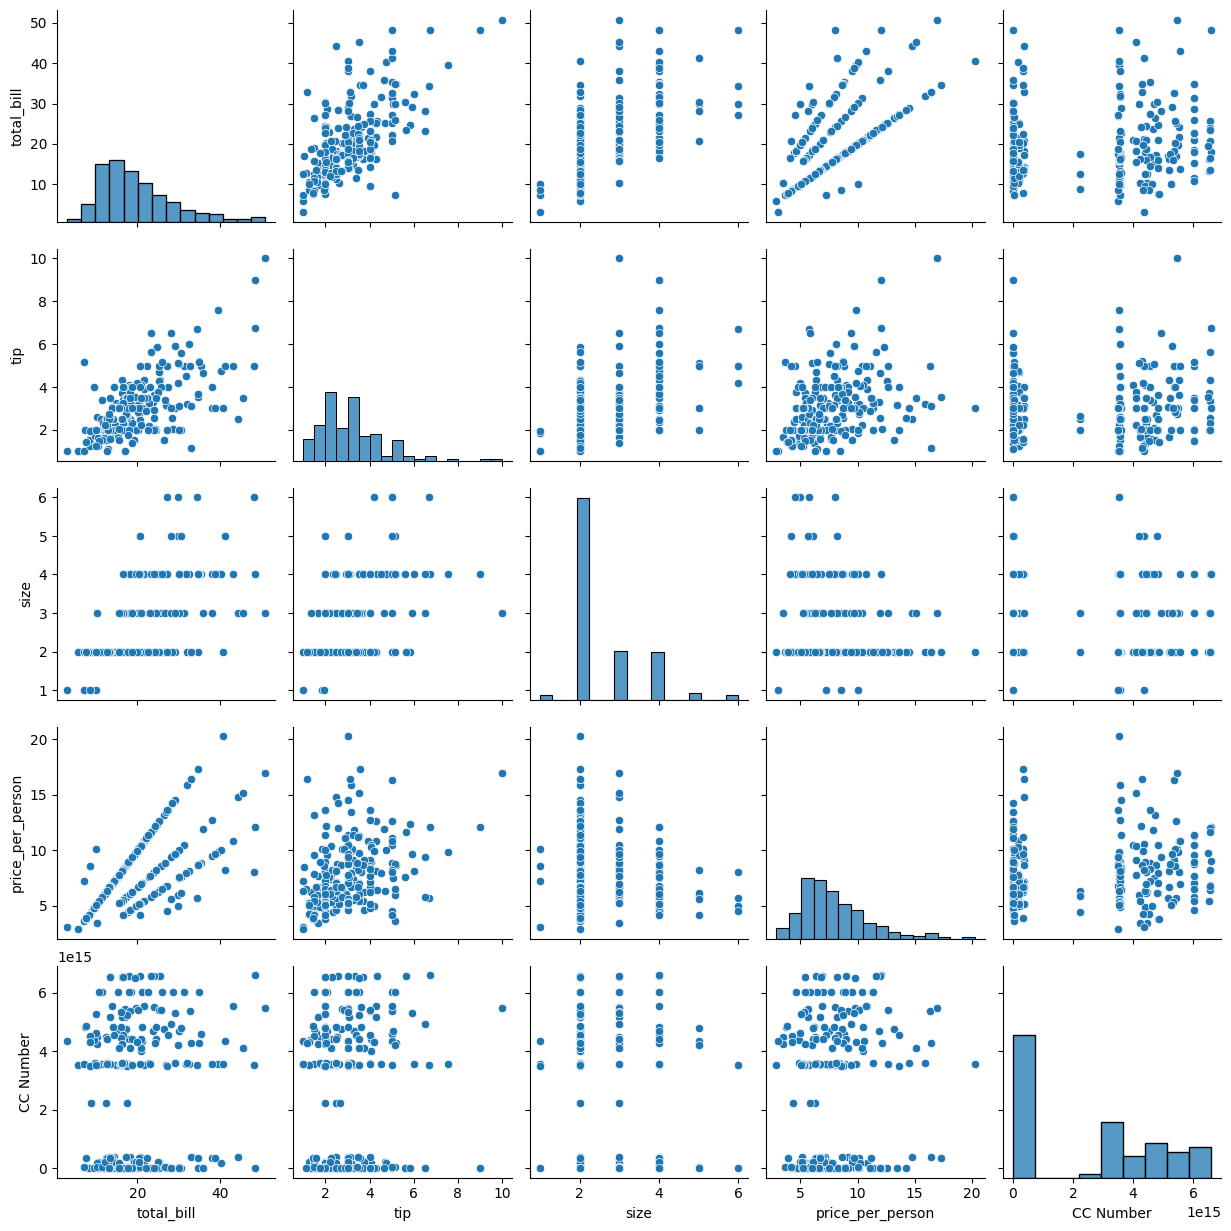

In [14]:
# Scatter Plot of Total Bill vs Tip 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=restaurant_data, color='green') 
plt.title('Total Bill vs Tip')
plt.show()

# Pair Plot 
sns.pairplot(restaurant_data)  
plt.show()



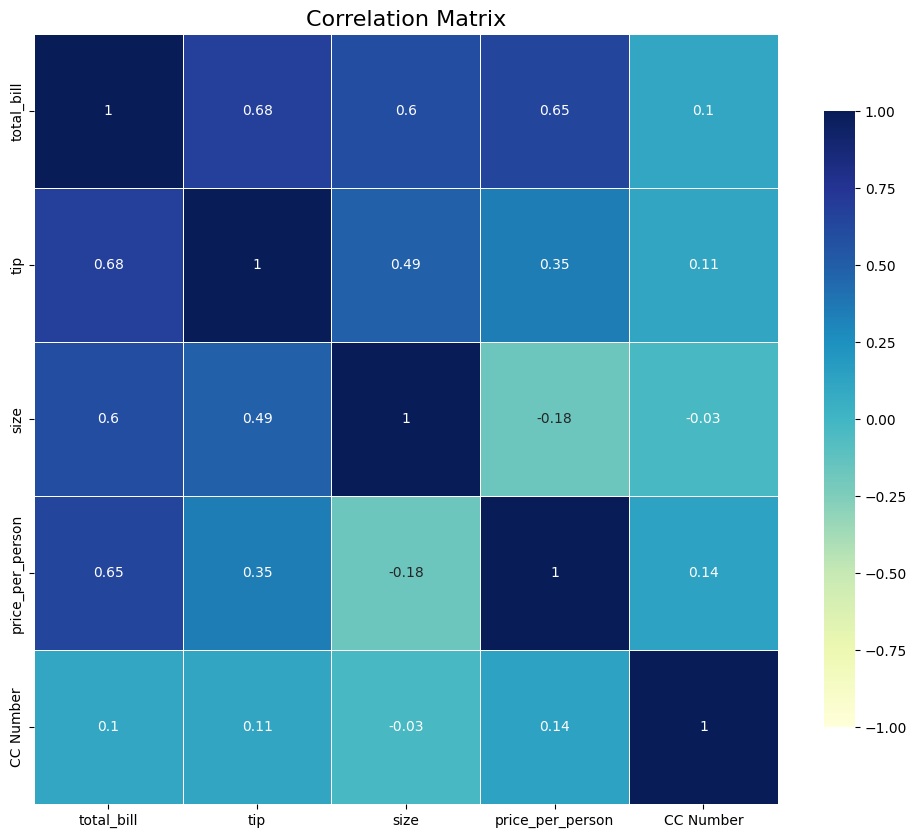

In [22]:


numeric_data = restaurant_data.select_dtypes(include=[np.number])

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix', fontsize=16)
plt.show()


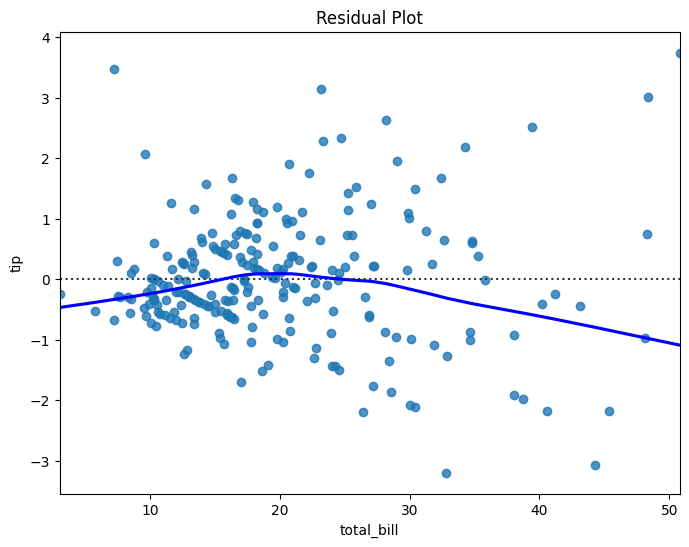

In [16]:
# Residual Plot 
plt.figure(figsize=(8, 6))
sns.residplot(x='total_bill', y='tip', data=restaurant_data, lowess=True, line_kws={'color': 'blue'})
plt.title('Residual Plot')
plt.show()


In [17]:
# Rainbow Test
X_const = sm.add_constant(features_data[['total_bill', 'size']])
ols_model = sm.OLS(target_data, X_const).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(ols_model)

print("Rainbow Test P-Value:", rainbow_p_val)
if rainbow_p_val < 0.05:
    print("Non-linearity detected. Consider non-linear models.")
else:
    print("Data appears linear.")


Rainbow Test P-Value: 0.17048935693447634
Data appears linear.


Conclusions:

**Focus on Larger Groups:** Tables with more people tend to leave higher tips, so prioritizing these customers could increase overall tip amounts.

**Optimize Dinner Service:** Dinner service generates higher tip amounts compared to lunch, so dedicating more resources to the dinner shift may help boost tips.

**Enhance Friday Service:** Fridays see lower tip rates, so improving the quality of service on this day could lead to a higher average tip.

**Capitalize on Sundays:** Sundays attract the highest tip rates, so the business should ensure top-tier service on this day to maximize revenue.

**Leverage Total Bill Amounts:** There is a strong correlation between the total bill and the tip. Focus on increasing the overall bill amount by offering upsells and premium services to improve tip amounts.